# 1. Raw Data Evaluation. Categorical Data to Numeric Conversion

# A very good introduction to pre-process steps:
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

## Import the required libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

## Separate Continues, Ordinal Descrete and Nominal Descrete in Train file

In [2]:
trainFile = 'house-prices-advanced-regression-techniques/train.csv'
trainDF = pd.read_csv(trainFile)

trainDF.drop(['Id'], axis=1, inplace=True)

descreteVars_Nominal = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
                        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                        'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
                        'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

descreteVars_Ordinal = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
                        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                        'KitchenQual','Functional',  'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                        'PavedDrive', 'PoolQC', 'Fence']

resultVar = ['SalePrice']

continuesVars = list(set(list(trainDF)) - set(descreteVars_Nominal) - set(descreteVars_Ordinal) - set(resultVar))

print('trainDF: ')
print(list(trainDF))
print('descreteVars_Nominal: ')
print(descreteVars_Nominal)
print('descreteVars_Ordinal: ')
print(descreteVars_Ordinal)
print('continuesVars: ')
print(continuesVars)



trainDF: 
['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Poo

In [3]:
conDF = trainDF[continuesVars]
des_ord_DF = trainDF[descreteVars_Ordinal]
des_nom_DF = trainDF[descreteVars_Nominal]
resultCol = trainDF[resultVar]

## Map Ordinal Categorical data to Numerical

In [4]:
for var in des_ord_DF:
    print(var)
    print(des_ord_DF[var].unique())

LotShape
['Reg' 'IR1' 'IR2' 'IR3']
Utilities
['AllPub' 'NoSeWa']
LandSlope
['Gtl' 'Mod' 'Sev']
ExterQual
['Gd' 'TA' 'Ex' 'Fa']
ExterCond
['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual
['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond
['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure
['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
HeatingQC
['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual
['Gd' 'TA' 'Ex' 'Fa']
Functional
['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
FireplaceQu
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageFinish
['RFn' 'Unf' 'Fin' nan]
GarageQual
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
PavedDrive
['Y' 'N' 'P']
PoolQC
[nan 'Ex' 'Fa' 'Gd']
Fence
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


### Read Ordinal Categorical dictionary from file

In [5]:
import json 
fileName = 'cat_ord_dict.txt'
f = open(fileName,'r')
conversion_dict = json.loads(f.read())
print(conversion_dict)

{'LotShape': {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}, 'Utilities': {'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}, 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2}, 'ExterQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, 'ExterCond': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}, 'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, 'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, 'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}, 'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}, 'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}, 'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}, 'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}, 'Functional': {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}, 'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, 'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA

In [6]:
# des_ord_DF = des_ord_DF.map(conversion_dict)
# for var in des_ord_DF:
#     print(var)
#     print(des_ord_DF[var].unique())

cat_ord_DF_numerical = des_ord_DF.copy()
for feature in conversion_dict:
    print(feature)
    print(des_ord_DF[feature].unique())
    temp_conversion_dict = conversion_dict[feature]
    if ('NA' in temp_conversion_dict): # Replace 'NA' with np.nan
        temp_conversion_dict[np.nan] = temp_conversion_dict.pop('NA')
    print(temp_conversion_dict)
    cat_ord_DF_numerical[feature] = des_ord_DF[feature].map(temp_conversion_dict)
    print(cat_ord_DF_numerical[feature].unique())
    print('------------')



LotShape
['Reg' 'IR1' 'IR2' 'IR3']
{'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}
[3 2 1 0]
------------
Utilities
['AllPub' 'NoSeWa']
{'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}
[3 1]
------------
LandSlope
['Gtl' 'Mod' 'Sev']
{'Gtl': 0, 'Mod': 1, 'Sev': 2}
[0 1 2]
------------
ExterQual
['Gd' 'TA' 'Ex' 'Fa']
{'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
[3 2 4 1]
------------
ExterCond
['TA' 'Gd' 'Fa' 'Po' 'Ex']
{'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
[2 3 1 0 4]
------------
BsmtQual
['Gd' 'TA' 'Ex' nan 'Fa']
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, nan: 0}
[4 3 5 0 2]
------------
BsmtCond
['TA' 'Gd' nan 'Fa' 'Po']
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, nan: 0}
[3 4 0 2 1]
------------
BsmtExposure
['No' 'Gd' 'Mn' 'Av' nan]
{'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, nan: 0}
[1 4 2 3 0]
------------
BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
{'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, nan: 0}
[6 5 1 3 4 0 2]
------------
BsmtFinType2
['Unf' '

## Map Nominal Categorical data to Numerical

### Installing required libraries

In [7]:
# ! python -m pip install --upgrade pip
# ! pip install category_encoders

In [8]:
# from sklearn.preprocessing import LabelBinarizer
import category_encoders as ce
import pickle
import os

cat_nom_DF = des_nom_DF.fillna('NULL').astype(str)
print(cat_nom_DF.shape)
cat_nom_list_numerical = []
encoders_folder_name = 'encoders'
if (not os.path.exists(encoders_folder_name)):
    os.makedirs(encoders_folder_name)
    
for cat_nom_col_name in cat_nom_DF:
    temp_col = cat_nom_DF[cat_nom_col_name]
    ce_binary = ce.BinaryEncoder(cols=cat_nom_col_name)
    encoded = ce_binary.fit_transform(temp_col).drop([cat_nom_col_name+'_0'], axis=1)
    cat_nom_list_numerical.append(encoded)
    ############ Save the fitted model ###########
    
    file_name = encoders_folder_name+'/'+'ce_binary_'+cat_nom_col_name+'.dat'
    pickle.dump(ce_binary, open(file_name, 'wb'))

cat_nom_DF_numerical = pd.concat(cat_nom_list_numerical, axis=1)
print(cat_nom_DF_numerical.head())


(1460, 24)
   MSSubClass_1  MSSubClass_2  MSSubClass_3  MSSubClass_4  MSZoning_1  \
0             0             0             0             1           0   
1             0             0             1             0           0   
2             0             0             0             1           0   
3             0             0             1             1           0   
4             0             0             0             1           0   

   MSZoning_2  MSZoning_3  Street_1  Alley_1  Alley_2  ...  MiscFeature_1  \
0           0           1         1        0        1  ...              0   
1           0           1         1        0        1  ...              0   
2           0           1         1        0        1  ...              0   
3           0           1         1        0        1  ...              0   
4           0           1         1        0        1  ...              0   

   MiscFeature_2  MiscFeature_3  SaleType_1  SaleType_2  SaleType_3  \
0              0

## Merge Numerical, Ordinal Categorical and Nominal Categorical together, now that they are all numeric.

In [9]:
conDF = pd.concat([conDF, cat_ord_DF_numerical, cat_nom_DF_numerical], axis=1)

## Show columns distribution histogram

In [10]:
# colIndex=0
# binwidth = 5


# listOFContinuesCols = list(conDF)

# nrows = len(listOFContinuesCols)
# ncols = 1

# for continuesCol in conDF:
#     print(continuesCol)
#     tempCol = conDF[continuesCol].dropna()
#     colMax = tempCol.max()
#     colMin = tempCol.min()
#     colDelta = colMax - colMin
#     print('Max: ' + str(colMax))
#     print('Min: ' + str(colMin))
#     print('Delta: ' + str(colDelta))
    
    
#     plt.hist(tempCol, bins=20)
    
#     plt.show()
#     print('----------------------')

## Analysing 'SalePrice'


In [11]:
#descriptive statistics summary
resultCol.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


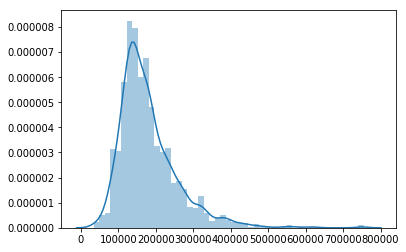

In [12]:
import seaborn as sns
#histogram
sns.distplot(resultCol);

In [13]:
#skewness and kurtosis
print("Skewness: %f" % resultCol.skew())
print("Kurtosis: %f" % resultCol.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Relationship with numerical variables

In [14]:
# for continuesCol in conDF:
#     tempCol = conDF[continuesCol]
#     data = pd.concat([resultCol, tempCol], axis=1)
#     data.plot.scatter(x=continuesCol, y='SalePrice', ylim=(0,800000));

# correlation matrix

<class 'pandas.core.frame.DataFrame'>
(129, 129)


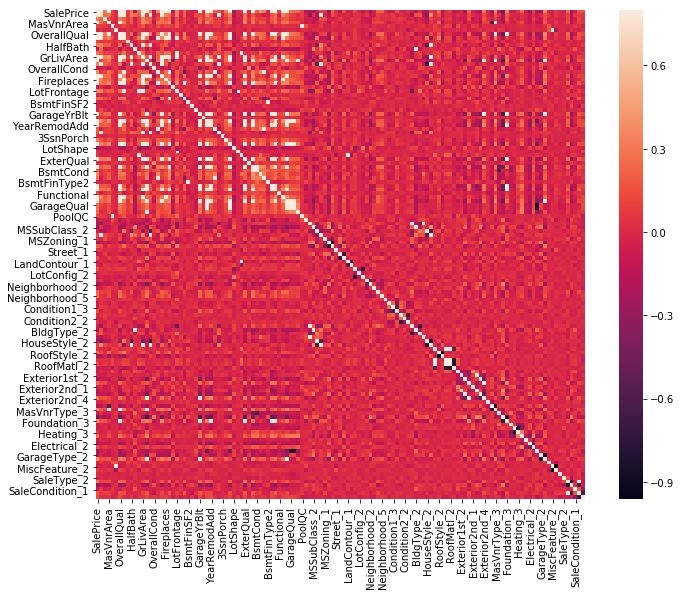

In [15]:

contAndResultDF = pd.concat([resultCol, conDF],axis=1)
corrmat = contAndResultDF.corr()
print(type(corrmat))
print(corrmat.shape)

corrmat1 = corrmat.copy()
corrmat1[corrmat1>0.4]=1
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat1, vmax=.8, square=True);

#### 'SalePrice' correlation matrix (zoomed heatmap style)

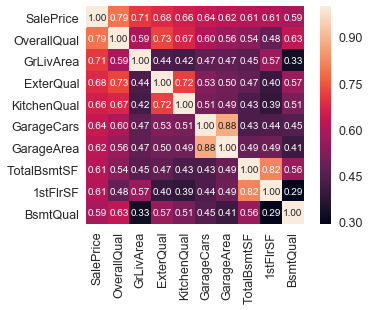

In [16]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(contAndResultDF[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [17]:
outputDF = pd.concat([conDF, resultCol],axis=1)
outputDF.to_csv('house-prices-advanced-regression-techniques/train_numeric.csv', index=False)

## Convert Ordinal Categorical and Nominal Categorical data in Test set to Numerical

In [18]:
import pandas as pd
testFile = 'house-prices-advanced-regression-techniques/test.csv'
testDF = pd.read_csv(testFile)

conDF_test = testDF[continuesVars]
des_ord_DF_test = testDF[descreteVars_Ordinal]
des_nom_DF_test = testDF[descreteVars_Nominal]


### Ordinal Categorical to Numerical

In [19]:
import json 
fileName = 'cat_ord_dict.txt'
f = open(fileName,'r')
conversion_dict = json.loads(f.read())

In [20]:
cat_ord_DF_test_numerical = des_ord_DF_test.copy()
for feature in conversion_dict:
    temp_conversion_dict = conversion_dict[feature]
    if ('NA' in temp_conversion_dict): # Replace 'NA' with np.nan
        temp_conversion_dict[np.nan] = temp_conversion_dict.pop('NA')
    cat_ord_DF_test_numerical[feature] = des_ord_DF_test[feature].map(temp_conversion_dict)

### Nominal Categorical to Numerical

In [21]:
# from sklearn.preprocessing import LabelBinarizer
import category_encoders as ce
import pickle
import os

cat_nom_DF_test = des_nom_DF_test.fillna('NULL').astype(str)
print(cat_nom_DF_test.shape)
cat_nom_list_test_numerical = []
encoders_folder_name = 'encoders'
    
for cat_nom_col_name in cat_nom_DF_test:
    ############ Load the fitted model ###########
    file_name = encoders_folder_name+'/'+'ce_binary_'+cat_nom_col_name+'.dat'
    ce_binary = pickle.load(open(file_name, 'rb'))

    temp_col = cat_nom_DF_test[cat_nom_col_name]
    encoded = ce_binary.transform(temp_col).drop([cat_nom_col_name+'_0'], axis=1)
    cat_nom_list_test_numerical.append(encoded)

cat_nom_DF_test_numerical = pd.concat(cat_nom_list_test_numerical, axis=1)
print(cat_nom_DF_test_numerical.head())


(1459, 24)
   MSSubClass_1  MSSubClass_2  MSSubClass_3  MSSubClass_4  MSZoning_1  \
0             0             0             1             0           1   
1             0             0             1             0           0   
2             0             0             0             1           0   
3             0             0             0             1           0   
4             1             0             0             0           0   

   MSZoning_2  MSZoning_3  Street_1  Alley_1  Alley_2  ...  MiscFeature_1  \
0           0           1         1        0        1  ...              0   
1           0           1         1        0        1  ...              0   
2           0           1         1        0        1  ...              0   
3           0           1         1        0        1  ...              0   
4           0           1         1        0        1  ...              0   

   MiscFeature_2  MiscFeature_3  SaleType_1  SaleType_2  SaleType_3  \
0              0

In [22]:
conDF_test = pd.concat([conDF_test, cat_ord_DF_test_numerical, cat_nom_DF_test_numerical], axis=1)

In [23]:
outputDF = conDF_test
outputDF.to_csv('house-prices-advanced-regression-techniques/test_numeric.csv', index=False)